Q2: -1.4813719187196193
r2_test: 0.37589810103794563
MAE_test: 1.476909850150164
MSE_test: 3.58573177050477
RMSE_test: 1.8936028544826315
r2_train: 0.4749318010045437
MAE_train: 1.3646204710426757
MSE_train: 3.023004154850615
RMSE_train: 1.7386788532821738


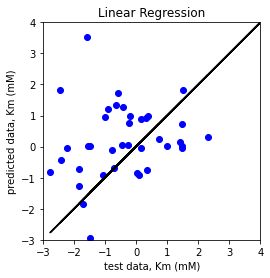

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

db = pd.read_csv('DiZyme.csv')

di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)
x = db.loc[:,'Syngony':'volume'].values
y = db.loc[:,'Kcat'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train =np.log10(y_train)
y_test = np.log10(y_test)

regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))

plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('Linear Regression')
plt.xlabel('test data, Km (mM)')
plt.ylabel('predicted data, Km (mM)')
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Q2: -0.8782555275310349
r2_test: 0.050142914058409094
MAE_test: 1.050777357068869
MSE_test: 1.5629016654897785
RMSE_test: 1.2501606558717877
r2_train: 0.19070268496761666
MAE_train: 0.8129121673911242
MSE_train: 1.1122786699812837
RMSE_train: 1.0546462297762618


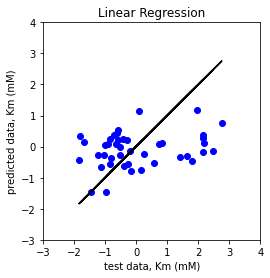

In [3]:
x = db.loc[:,'Syngony':'Ccat'].values
y = db.loc[:,'Km'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train =np.log10(y_train)
y_test = np.log10(y_test)

regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))

plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('Linear Regression')
plt.xlabel('test data, Km (mM)')
plt.ylabel('predicted data, Km (mM)')
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()